In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
test.shape

(28000, 784)

In [7]:
y_train = train.pop('label')


In [8]:
train = train/255.0
test = test/255.0

In [9]:
x_train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=99)

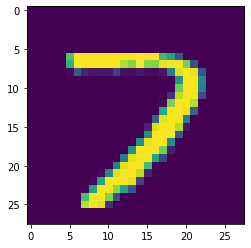

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[12][:,:,0])

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5,batch_size=128)

Epoch 1/5
263/263 [==============================] - 229s 868ms/step - loss: 1.5780 - accuracy: 0.4779 - val_loss: 0.2274 - val_accuracy: 0.9608
Epoch 2/5
263/263 [==============================] - 223s 849ms/step - loss: 0.2676 - accuracy: 0.9578 - val_loss: 0.1155 - val_accuracy: 0.9787
Epoch 3/5
263/263 [==============================] - 198s 751ms/step - loss: 0.1573 - accuracy: 0.9728 - val_loss: 0.0924 - val_accuracy: 0.9794
Epoch 4/5
263/263 [==============================] - 161s 612ms/step - loss: 0.1173 - accuracy: 0.9784 - val_loss: 0.0615 - val_accuracy: 0.9860
Epoch 5/5
263/263 [==============================] - 131s 497ms/step - loss: 0.0881 - accuracy: 0.9835 - val_loss: 0.0592 - val_accuracy: 0.9855


In [25]:
acc = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(len(acc))

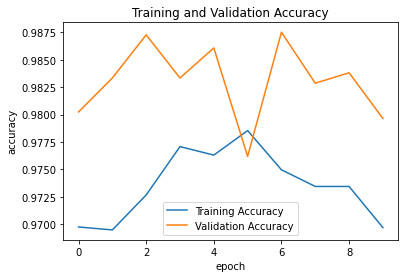

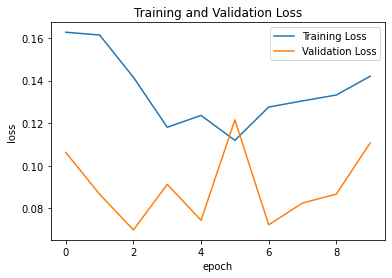

In [26]:
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title("Training and Validation Accuracy")
plt.savefig('CNNrelu_acc', dpi=300, bbox_inches='tight')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Training and Validation Loss")
plt.savefig('CNNrelu_loss', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

In [21]:
predictions = model.predict(test)

AttributeError: 'Series' object has no attribute 'score'

In [22]:
predictions = np.argmax(predictions, axis = 1)
predictions = pd.Series(predictions, name = 'Label')

In [24]:
submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), predictions], axis = 1)